In [1]:
### General libraries ###
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import graphviz 
from graphviz import Source
from IPython.display import SVG
from scipy.stats import uniform

##################################

### Sklearn ML modules
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

### TF ML modules
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, BatchNormalization, LSTM, Dropout
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.constraints import MaxNorm

##################################

### Metrics ###
from sklearn import metrics
from sklearn.metrics import f1_score,confusion_matrix, mean_squared_error, mean_absolute_error, classification_report, \
    roc_auc_score, roc_curve, precision_score, recall_score

In [2]:
# Load the data.
data=pd.read_excel('default of credit card clients-1.xlsx', header=1)

In [3]:
# Drop "ID" column.
data=data.drop(['ID'], axis=1)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [5]:
# Check for duplicate rows.
print(f"There are {data.duplicated().sum()} duplicate rows in the data set.")

# Remove duplicate rows.
data=data.drop_duplicates()
print("The duplicate rows were removed.")

There are 35 duplicate rows in the data set.
The duplicate rows were removed.


In [6]:
# Check for null values.
print(f"There are {data.isna().any().sum()} cells with null values in the data set.")

There are 0 cells with null values in the data set.


In [7]:
# Distinguish attribute columns and class column.
X=data[data.columns[:-1]]
data = data.rename(columns={'default payment next month': 'dpnm'})
y=data['dpnm']

In [8]:
# Split to train and test sets. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777)

In [9]:
# Standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Initialize a Multi-layer Perceptron classifier.
mlp = MLPClassifier(hidden_layer_sizes=(12,5),max_iter=1000, random_state=777,shuffle=True, verbose=False)

# Train the classifier.
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(12, 5), max_iter=1000, random_state=777)

In [11]:
# Make predictions.
mlp_pred = mlp.predict(X_test)

# CV score
mlp_cv=cross_val_score(mlp, X_train, y_train, cv=10).mean()

In [12]:
# Accuracy: 1 is perfect prediction.
print('Accuracy: %.4f' % mlp.score(X_test, y_test))
# Cross-Validation accuracy
print('Cross-validation accuracy: %0.4f' % mlp_cv)
# Precision
print('Precision: %.4f' % precision_score(y_test, mlp_pred))
# Recall
print('Recall: %.4f' % recall_score(y_test, mlp_pred))
# f1 score: best value at 1 (perfect precision and recall) and worst at 0.
print('F1 score: %.4f' % f1_score(y_test, mlp_pred))

Accuracy: 0.8260
Cross-validation accuracy: 0.8174
Precision: 0.6399
Recall: 0.4028
F1 score: 0.4944


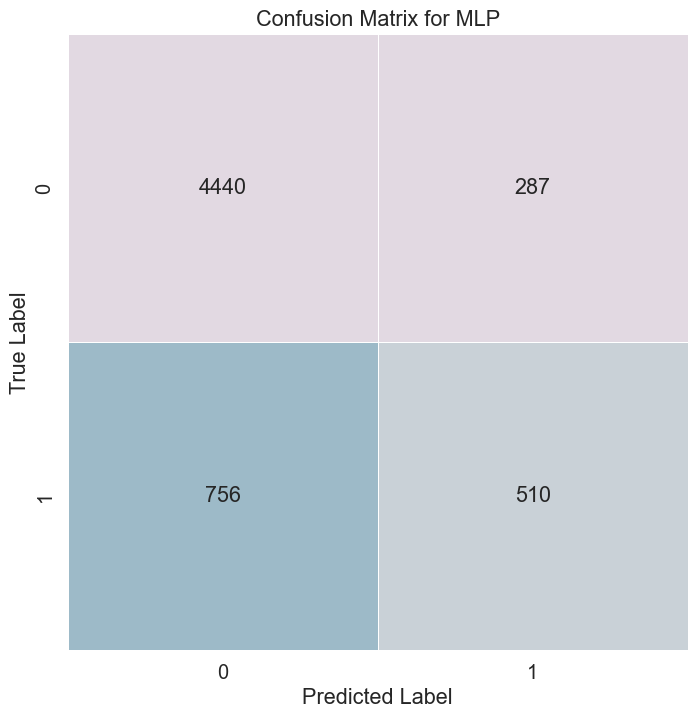

In [13]:
# Plot confusion matrix for Multi-layer Perceptron.
matrix = confusion_matrix(y_test,mlp_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(8, 8))
sns.heatmap(matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for MLP');

In [15]:
# Hyperparameters to be checked.
#parameters = {'activation':['logistic','relu'],
#              'solver': ['lbfgs','adam','sgd'],
#              'alpha':10.0 ** -np.arange(1,3),
#              'hidden_layer_sizes':[(23),(12,5),(12,5,2),(3,1),(5)],
#              'batch_size': batch_size, 'epochs': epochs}

## Original Modelo

In [19]:
def create_model():
    # create model
    model = Sequential()
    model.add(Input(shape=(23,)))
    model.add(BatchNormalization())
    model.add(Dense(12, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2)),
    model.add(Dense(5, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
model = KerasClassifier(model=create_model, verbose=0)

### Epoch and Batch Optimization

In [20]:
seed = 777
tf.random.set_seed(seed)
# define the grid search parameters
batch_size = [40, 50, 60, 80, 100, 150, 200]
epochs = [10, 25, 30, 50]
param_grid = dict(batch_size=batch_size, epochs=epochs)
param_grid

{'batch_size': [40, 50, 60, 80, 100, 150, 200], 'epochs': [10, 25, 30, 50]}

#### Grid Search

In [ ]:
gridSearch_grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, cv=3)
gridSearch_result = gridSearch_grid.fit(X, y)

In [ ]:
# gridSearch results
print("Best: %f using %s" % (gridSearch_result.best_score_, gridSearch_result.best_params_))

In [ ]:
#Heatmap Variables
gridSearch_batch_size_values = gridSearch_result.param_grid['batch_size']
gridSearch_epochs_values = gridSearch_result.param_grid['epochs']
gridSearch_mean_test_scores = gridSearch_result.cv_results_['mean_test_score']

num_gridSearch_batch_size_values = len(gridSearch_batch_size_values)
num_gridSearch_epochs_values = len(gridSearch_epochs_values)
gridSearch_mean_test_scores = np.array(gridSearch_mean_test_scores).reshape(num_gridSearch_batch_size_values, num_gridSearch_epochs_values)

#figure size and format
plt.figure(figsize=(8,2))  
sns.heatmap(gridSearch_mean_test_scores, annot=True, fmt='.6f', 
            xticklabels=gridSearch_epochs_values, 
            yticklabels=gridSearch_batch_size_values, 
            cmap='coolwarm')
plt.xlabel('Batch Size')
plt.ylabel('Epochs') 
plt.title('Batch size vs Epochs Heatmap')

# Show the plot
plt.show()

#### Random Search

In [ ]:
randomSearch_batch_size =np.arange(20, 501)
randomSearch_epochs = np.arange(80,201)
randomSearch_param_grid = dict(batch_size=randomSearch_batch_size, epochs=randomSearch_epochs)

In [ ]:
RandomizedSearch_grid = RandomizedSearchCV(estimator=model, param_distributions=randomSearch_param_grid, n_iter =10, n_jobs=-1, cv=5)
RandomizedSearch_result = RandomizedSearch_grid.fit(X, y)

In [ ]:
# gridSearch results
print("Best: %f in Random Search using %s" % (RandomizedSearch_result.best_score_, RandomizedSearch_result.best_params_))

In [ ]:
#Heatmap Variables
RandomizedSearch_batch_size_values = RandomizedSearch_result.cv_results_['param_batch_size'].data.astype(int)
RandomizedSearch_epochs_values = RandomizedSearch_result.cv_results_['param_epochs'].data.astype(int)
RandomizedSearch_mean_test_scores = RandomizedSearch_result.cv_results_['mean_test_score']

In [ ]:
RandomizedSearch_mean_test_scores, RandomizedSearch_batch_size_values, RandomizedSearch_epochs_values

In [ ]:
#figure size and format
plt.figure(figsize=(13,3))  
plt.xlabel('Batch Size', fontsize=8)
plt.ylabel('Epochs', fontsize=8)
plt.scatter(RandomizedSearch_batch_size_values,RandomizedSearch_epochs_values, c=RandomizedSearch_mean_test_scores, cmap='coolwarm')
plt.title('Batch size vs Epochs Heatmap')
cbar = plt.colorbar()
for i, val in enumerate(RandomizedSearch_mean_test_scores):
    plt.text(RandomizedSearch_batch_size_values[i], RandomizedSearch_epochs_values[i], f'{val:.6f}', ha='right', va='baseline', fontsize=8)
# Show the plot
plt.show()

In [ ]:
###